Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [104]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/384453/conversion.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [7]:
df.shape

(1143, 11)

In [9]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [32]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [33]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения.

In [53]:
Impressions_for_FB = df.groupby('fb_campaign_id', as_index = False).agg({'Impressions':'sum'})
Impressions_for_FB.Impressions = np.log(Impressions_for_FB.Impressions)
Impressions_for_FB

,fb_campaign_id,Impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


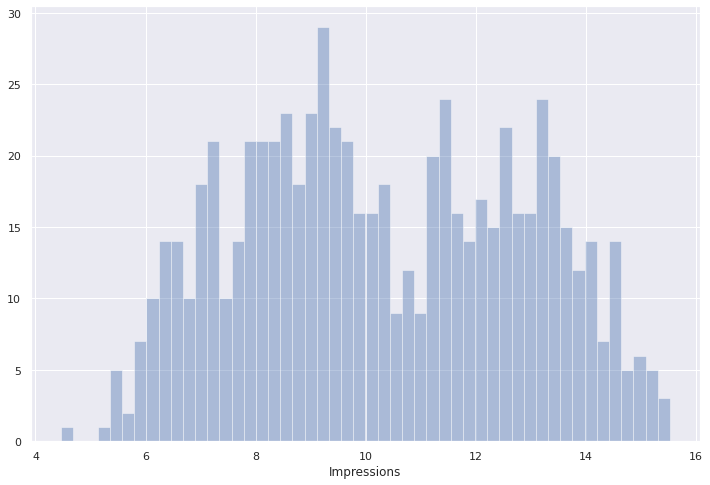

In [59]:
sns.set()
plt.figure(figsize = (12,8))
sns.distplot(Impressions_for_FB.Impressions, kde = False, bins = 50)

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [79]:
df['CTR'] = (df.Clicks / df.Impressions) 
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [80]:
df.CTR.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

In [81]:
df[['ad_id', 'CTR']].sort_values(by = 'CTR', ascending=False)

,ad_id,CTR
150,738637,0.001059
440,950224,0.000845
505,951779,0.000610
476,951202,0.000565
448,950537,0.000531
...,...,...
270,777166,0.000000
269,777131,0.000000
268,777130,0.000000
266,776935,0.000000


In [82]:
df.iloc[df.CTR.idxmax()]

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
Impressions                   944
Clicks                          1
Spent                        1.42
Total_Conversion                1
Approved_Conversion             0
CTR                    0.00105932
Name: 150, dtype: object

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Постройте график распределения CTR для кампании 916?

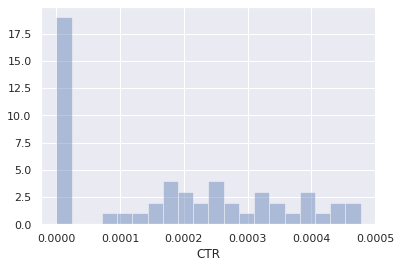

In [88]:
sns.distplot(df.query('xyz_campaign_id == 916').CTR, bins = 20, kde = False)

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов.
Выведите описательные статистики для новой переменной, посмотрите на форму распределения.

In [94]:
df['CPC'] = df.Spent / df.Clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [98]:
df.CPC.isna().sum()

207

In [119]:
df.CPC.describe()


count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

In [120]:
sp.iqr(df.CPC,nan_policy='omit').round(2) # межквартильный размах


0.25

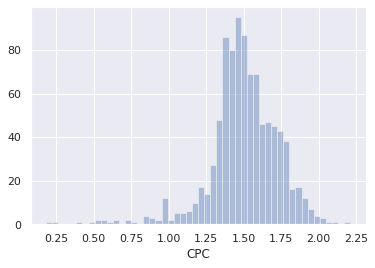

In [123]:
# форма распределения
sns.distplot(df.dropna().CPC, kde = False, bins = 50)

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

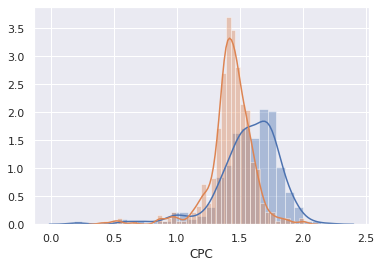

In [134]:
sns.distplot(df.dropna().query('gender == "M"').CPC)
sns.distplot(df.dropna().query('gender == "F"').CPC)

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [143]:
df['convertion_rate'] = df.Approved_Conversion / df.Clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,convertion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


In [170]:
round(df.query('ad_id == 1121814').convertion_rate.mul(100).iloc[0],2)

3.09